In [1]:
import os, json
from sqlite_db import *
import pandas as pd

path_to_json = 'C:/Users/david/OneDrive/Documents/Studium/UvA/Connections/roaddanger.org/roaddanger scraper/data/roaddanger_org_research_data.json/roaddanger_org_research_data.json'
path_to_database = "david_data.db"


C:\Users\david\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def open_roaddanger_db(path):
    with open(path) as json_file:
        return json.load(json_file)

data = open_roaddanger_db(path_to_json)

Test imports, it should 10701

In [3]:
display("total answers given: ",len(data["answers"]))

'total answers given: '

10701

Function to extract id-corresponding elements

In [ ]:
def articles_by_id(data, id:str) -> list:
    elements=[]
    for element in data:
        if element["articleid"] == id:
            elements.append(element)

    return elements

display(len(data["articles"]))

KeyError: 'articles'

In [4]:
data = data["answers"]
data = [item for item in data if item["questionid"] != 16]
len(data)

7422

Create dictionary to avoid computing articleid twice or mor

In [5]:
dehumanising_dic = {}

df = pd.DataFrame(data)

articles = df["articleid"].unique()

for article in articles:
    dehumanising_dic[article] = df[df["articleid"] == article]

len(dehumanising_dic)

    


3731

Filter out questions that have question id is in interval 10-16 (excluding 16)

In [8]:
keys_to_remove = []
for key, value in dehumanising_dic.items():
    q = value['questionid']
    if not (q >= 10).all():
        keys_to_remove.append(key)

for key in keys_to_remove:
    dehumanising_dic.pop(key,None)

# Filterout q
len(dehumanising_dic)

3691

Adding answers together to calculate dehumanisatinon

Values consists of three values because people can also say its unclear.

In [ ]:
new_dict = {}

for key, value in dehumanising_dic.items():
    s = value["answer"].replace(2,0)
    s = s.replace(1,1)
    new_dict[key] = s.sum()

display(dehumanising_dic)

Visualise distribution to verify results

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


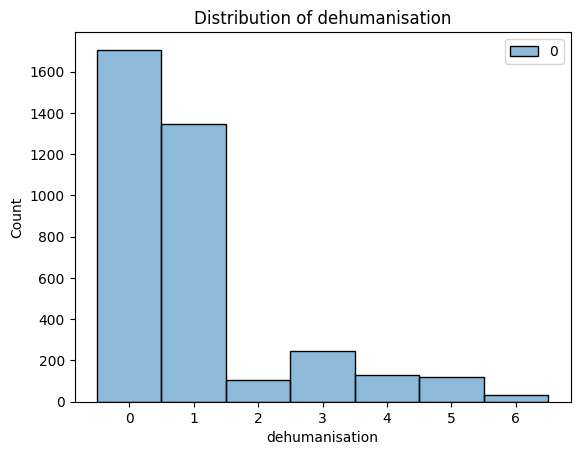

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a histogram of the 'country' column

sns.histplot(new_dict.values(), kde=False, discrete=True)
# Set the y-axis to a logarithmic scale
#plt.yscale('log')
# Display the plot
plt.title("Distribution of dehumanisation")
plt.xlabel("dehumanisation")
plt.ylabel("Count")
#plt.xticks(rotation=90)  # Rotate country labels for readability
plt.show()

In [96]:
counter=0
for key, value in new_dict.items():
    if value == 7:
        counter += 1
        print(f"articleid: {key} has a result of {value}")
counter

articleid: 13032 has a result of 7
articleid: 14697 has a result of 7
articleid: 15399 has a result of 7
articleid: 15620 has a result of 7
articleid: 15892 has a result of 7
articleid: 15893 has a result of 7
articleid: 18657 has a result of 7
articleid: 19115 has a result of 7


8

# Attemting to make sense of the results
articleid: 10432 has a result of 5
articleid: 12193 has a result of 5
articleid: 13339 has a result of 5
articleid: 17640 has a result of 5
articleid: 18078 has a result of 5
articleid: 18100 has a result of 5
articleid: 18499 has a result of 5

I could verify that articles that had a value of 6 where also clasified like that on roaddanger

article 10432,12193 (5) is not there, also not in other evaluations

13339,18078, 17640, 18100, 18499 is on the website



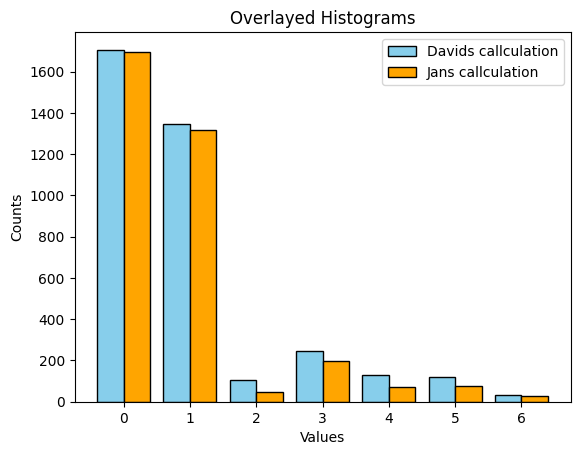

In [153]:
values = [0, 1, 2, 3, 4, 5, 6]
counts_roaddanger = [1697, 1316, 45, 198, 72, 77, 29]
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

counts = Counter(new_dict.values())
# Generate the list with counts for numbers 0 through 6
result = [counts.get(i, 0) for i in range(7)]

# Create a histogram of the 'country' column

#plt.xticks(rotation=90)  # Rotate country labels for readability

# Bar width for better visibility
bar_width = 0.4

# Generate bar positions
positions1 = np.arange(len(values))  # Bar positions for the first dataset
positions2 = positions1 + bar_width  # Bar positions for the second dataset

# Plot the histograms
plt.bar(positions1, result, width=bar_width, color='skyblue', label='Davids callculation', edgecolor='black')
plt.bar(positions2, counts_roaddanger, width=bar_width, color='orange', label='Jans callculation', edgecolor='black')

# Add labels, title, and legend
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Overlayed Histograms')
plt.xticks(positions1 + bar_width / 2, values)  # Center the tick labels between bars
plt.legend()

# Display the plot
plt.show()